# Limpieza de datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Datos
Fueron extraidos a partir de un trabajo de web scrapin realizado por 2 estudiantes de la UdeA, 
Este es el repositorio de donde se extrajo:

https://github.com/andres-soto-h/monografia-udea-eacd

In [21]:
!git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

Cloning into 'Precio-de-viviendas-en-colmbia'...


In [2]:
dfdata=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\consolidado_propiedades_FR_30052021.csv', delimiter=';', encoding='latin1')
dfdata.head(1)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,En zona Comercial,Finca cafetera,Servicio de Lavandería,Altura restringida,Ascensor(es) inteligente(s),Lote Vacio,Control de Acústica,Control térmico,Panorámica 360º,Con cerca eléctrica
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dfdata.info(show_counts=True, max_cols=190)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 188 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    tipo                           2715 non-null   object 
 1    url                            2715 non-null   object 
 2    titulo                         2715 non-null   object 
 3    precio                         2715 non-null   object 
 4    area                           2715 non-null   object 
 5    habitaciones                   2715 non-null   object 
 6    banos                          2715 non-null   object 
 7    garajes                        2715 non-null   object 
 8    descripcion                    2715 non-null   object 
 9    Balcón                         1401 non-null   float64
 10   Baño de Servicio               201 non-null    float64
 11   Chimenea                       459 non-null    float64
 12   Cocina Equipada                3

In [4]:
dfdata.shape

(2715, 188)

In [5]:
dfdata.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'Balcón',
       ...
       'En zona Comercial', 'Finca cafetera', 'Servicio de Lavandería',
       'Altura restringida', 'Ascensor(es) inteligente(s)', 'Lote Vacio',
       'Control de Acústica', 'Control térmico', 'Panorámica 360º',
       'Con cerca eléctrica'],
      dtype='object', length=188)

## deteccion de valores faltantes

1. cuantos valores existen por cada variable
2. cuantos nan por cada observacion
3. Cuantas variables, filas tienen X numeros de valores faltantes, para ver donde se acumulan estos nan

### numero de NaN por varible

In [6]:
# vistaso general de los valores faltante spor variable
dfdata.isna().sum()

tipo                      0
url                       0
titulo                    0
precio                    0
area                      0
                       ... 
Lote Vacio             2714
Control de Acústica    2713
Control térmico        2713
Panorámica 360º        2714
Con cerca eléctrica    2714
Length: 188, dtype: int64

In [7]:
# cantidad de nan en total
dfdata.isna().sum().sum()

431423

In [8]:
dfNan = dfdata.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda dfdata: (
                            dfdata.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(dfdata), # numero total de registros en el df original
                                    pct_missing = lambda dfdata1 : dfdata1.numero_Nan / dfdata1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
dfNan

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
...,...,...,...,...
183,Lote Vacio,2714,2715,99.963168
184,Control de Acústica,2713,2715,99.926335
185,Control térmico,2713,2715,99.926335
186,Panorámica 360º,2714,2715,99.963168


Text(0, 0.5, 'Variable en orden ascendente en razon al numero de Nan')

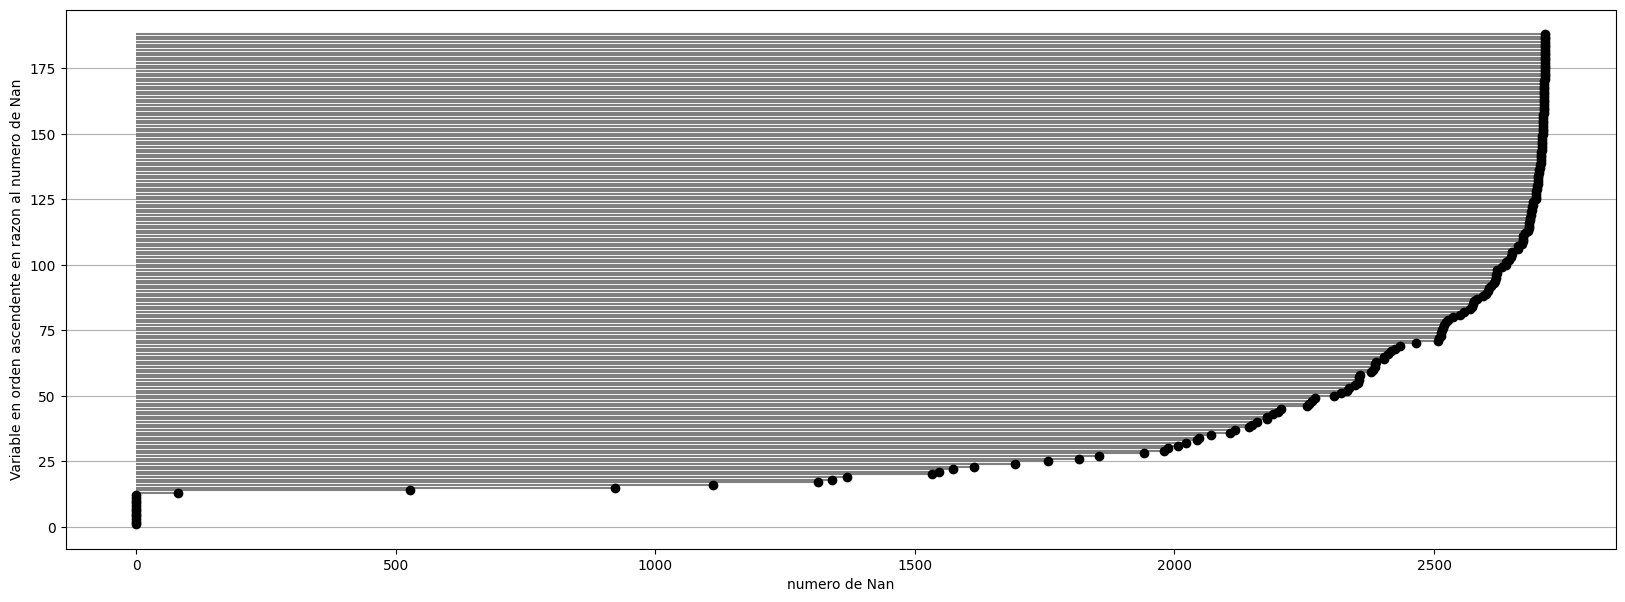

In [9]:
# grafica de los Nan
plt.figure(figsize=(20,7))
dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
# plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
plt.xlabel("numero de Nan")
plt.ylabel("Variable en orden ascendente en razon al numero de Nan")

In [12]:
sumnan = sum(dfNan['pct_missing']>70)
pornandfp = sumnan/ dfdata.shape[1] * 100
print(f'porcentaje de variables que tienne mas de 2000 valores faltantes {round(pornandfp,0)} lo que equivale a {sumnan} variables de {dfdata.shape[1]}')

porcentaje de variables que tienne mas de 2000 valores faltantes 86.0 lo que equivale a 161 variables de 188


De esta grafica que nos organiza las variables de manera ascendente por numero de valores faltantes se puede observar que 84% de las variables presentan una cantidad de nan mayores a 2000, lo que equivale a 161 variables de 181 , por lo que se asume que estas variables no son de gran utilidad para el objetivo del proyecto

## eliminacion de columnas innecesarias


se eliminan las variables con mas del 70% de observaciones iguales a nan
debido a que las columnas que se van a eliminar tienne una grandisima cantidad de valores faltantes no se podran imputar ni tratas, por lo tanto se eliminaran

In [14]:
dfdatac = dfdata.dropna(axis=1, thresh=dfdata.shape[0]-1900)

In [15]:
dfdatac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo                           2715 non-null   object 
 1   url                            2715 non-null   object 
 2   titulo                         2715 non-null   object 
 3   precio                         2715 non-null   object 
 4   area                           2715 non-null   object 
 5   habitaciones                   2715 non-null   object 
 6   banos                          2715 non-null   object 
 7   garajes                        2715 non-null   object 
 8   descripcion                    2715 non-null   object 
 9   Balcón                         1401 non-null   float64
 10  Trans. Público cercano         1604 non-null   float64
 11  caractint                      2715 non-null   object 
 12  caractext                      2715 non-null   o

In [16]:
dfNanc = dfdatac.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda dfdatac: (
                            dfdatac.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(dfdatac), # numero total de registros en el df original
                                    pct_missing = lambda dfdatac1 : dfdatac1.numero_Nan / dfdatac1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
dfNanc

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,2715,0.000000
1,url,0,2715,0.000000
2,titulo,0,2715,0.000000
3,precio,0,2715,0.000000
4,area,0,2715,0.000000
5,habitaciones,0,2715,0.000000
6,banos,0,2715,0.000000
7,garajes,0,2715,0.000000
8,descripcion,0,2715,0.000000
9,Balcón,1314,2715,48.397790


Text(0, 0.5, 'Variable en orden ascendente en razon al numero de Nan')

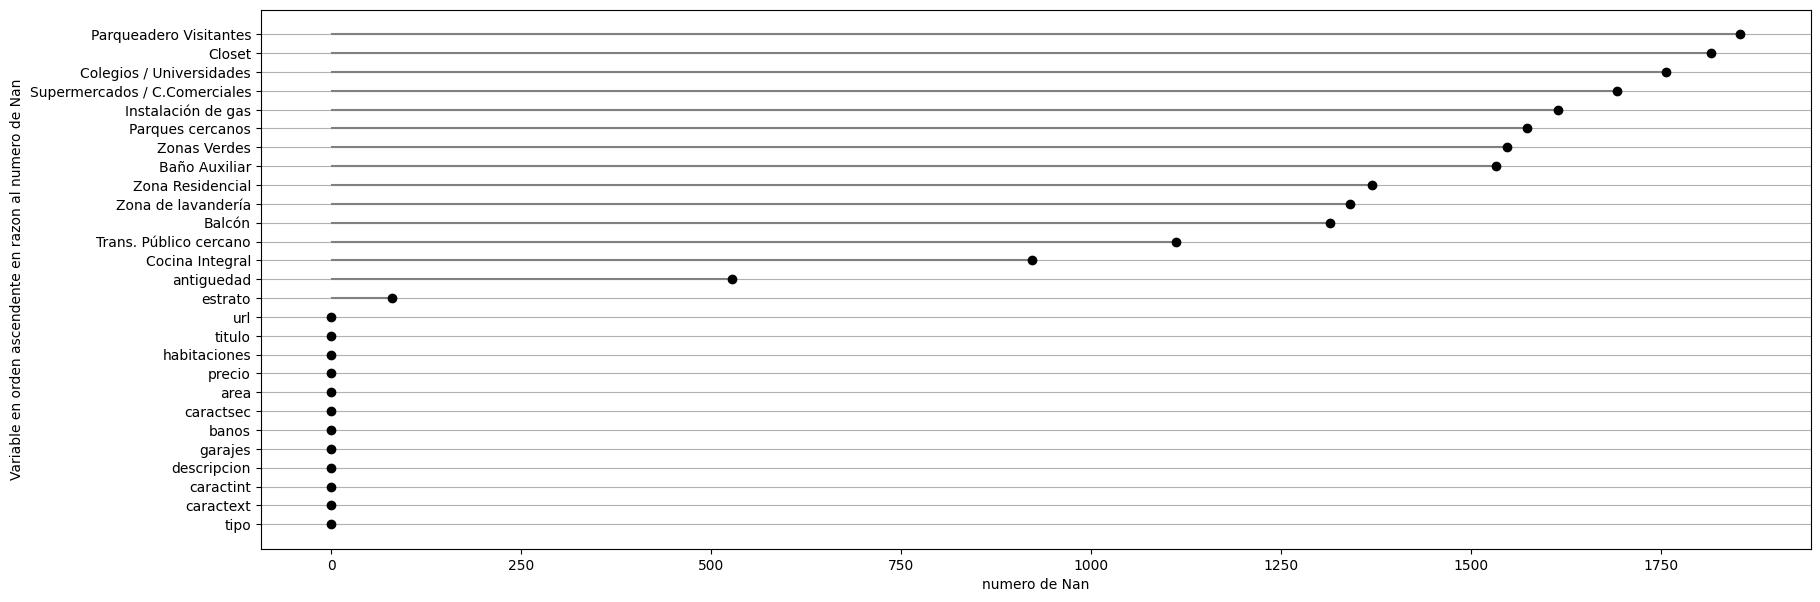

In [17]:
# grafica de los Nan
plt.figure(figsize=(20,7))
dfgnan = dfNanc.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
plt.xlabel("numero de Nan")
plt.ylabel("Variable en orden ascendente en razon al numero de Nan")

In [20]:
dfcleancol = dfdatac.to_csv('dfdatac', index=False)